In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'] = df['horsepower'].replace('?', np.nan)      # '?'을 np.nan으로 변경
df = df.dropna(subset=['horsepower'], axis=0)                 # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')           # 문자열을 실수형으로 변환

# horsepower 열의 통계 요약정보로 최대값(max)을 확인
df['horsepower'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

<Axes: >

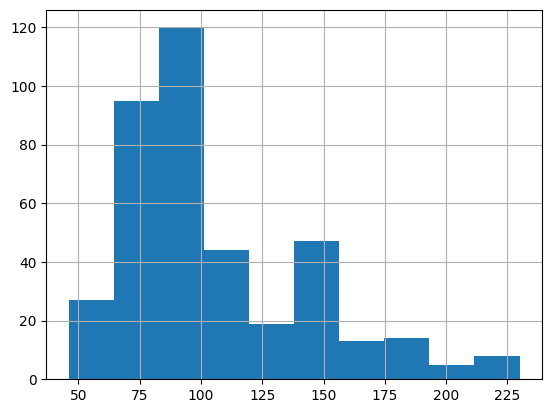

In [3]:
import matplotlib.pyplot as plt
df.horsepower.hist()

In [4]:
# horsepower 열을 Min-Max Scaling 적용 (판다스)
df['horsepower_minmax'] = (df['horsepower'] - df['horsepower'].min()) / \
                          (df['horsepower'].max() - df['horsepower'].min()) 

print(df['horsepower_minmax'].head())
print(df['horsepower'].head())


0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower_minmax, dtype: float64
0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: float64


<Axes: title={'center': 'minmaxscaling'}>

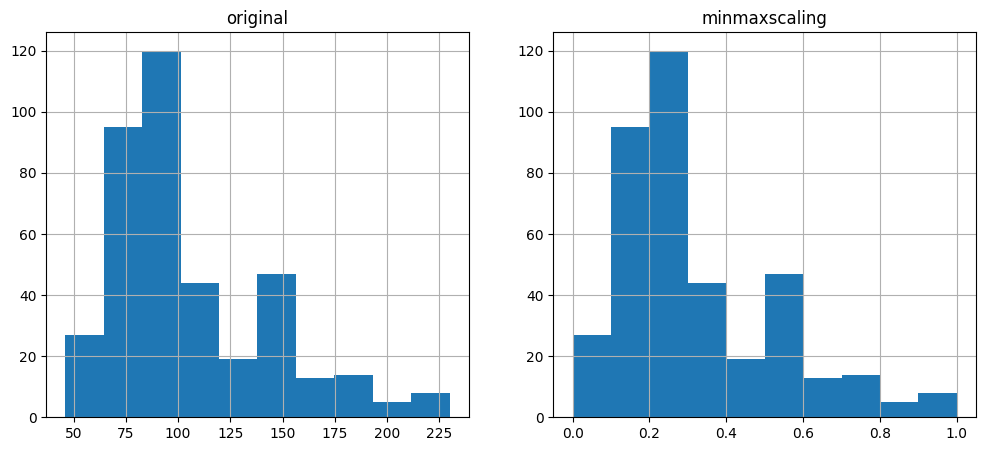

In [7]:
import matplotlib.pylab as plt
f,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_title('original')
ax[1].set_title('minmaxscaling')
df.horsepower.hist(ax=ax[0])
df.horsepower_minmax.hist(ax=ax[1])


In [8]:
# horsepower 열을 Min-Max Scaling 적용 (사이킷런)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['horsepower_minmax'] = scaler.fit_transform(df[['horsepower']])
df['horsepower_minmax'].head()

0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower_minmax, dtype: float64